# Linear Regression

**1.Describe the null hypotheses to which the p-values given in Table 3.4 correspond. Explain what conclusions you can draw based on these p-values. Your explanation should be phrased in terms of sales, TV, radio, and newspaper, rather than in terms of the coefficients of the linearmodel.**



![alt text](<../images/Screenshot 2024-05-07 210812.png>)

The null hypotheses corresponding to p-values above are the hypotheses the amount of spending on TV, radio and newspaper advertising is not associated with the number of units of sold. An example would be, assuming $\beta_{1}$ is the coefficient for TV,

$$
H_{0} : \beta_{1} = 0
$$
$$
H_{a} : \beta_{1} \ne 0
$$

Thats is the null is the coefficient is equal to zero and the alternative is the coefficient does not equal zero, i.e. there is some association. These hypotheses are tested using the t-statistic. The t-statistic for the coefficients of a linear regression model is simply,

$$
\frac{\hat{\beta}_{1}}{SE(\hat{\beta}_{1})}
$$

This is the studentised mean, where when we assume the null is true i.e. $\beta_{1} = 0$ the numerator is simply our estimate for the coefficient. A t-statistic close to zero means that our estimate for the coefficient is close to zero and is evidence in favour of the null, how close is too close depends and variance of our estimator which is captured by $SE(\hat{\beta}_{1})$. 

The p-values represent the probability that we observe a value of coefficient at least as extreme as the one we have observed i.e. they represent

$$
P(\beta_{1} \gt \hat{\beta}_{1} | H_{0})
$$

That is, the probability that the true coefficient is greater than the estimated coefficient given the null hypothesis is true. In table 3.4 the p-values for both advertising and and radio are very small, this means we can conclude the null is false (we would never observe these coefficents if the null were actually true) and there is some association between units sold and these two mediums. On the other hand, the p-value for newspaper is very high, it is highly likely that the observed coefficient is the result of pure chance and the null is true - there is no association between units sold and newspaper spend.

**2. Suppose we have a data set with five predictors, $X_{1} = GPA$, $X_{2} = IQ$, $X_{3} = \text{Level (1 for College and 0 for High School)}$, $X_{4} = \text{Interaction between GPA and IQ}$, and $X_{5} = \text{Interaction between GPA and Level}$. The response is starting salary after graduation (in thousands of dollars). Suppose we use least squares to fit the model, and get $\hat{\beta}_{0} = 50, \hat{\beta}_{1} = 20, \hat{\beta}_{2} = 0.07, \hat{\beta}_{3} = 35, \hat{\beta}_{4} = 0.01, \hat{\beta}_{5} = −10.$**

*(a) Indicate which answer is correct and why.*

1. For a fixed value of IQ and GPA, high school graduates earn more, on average, than college graduates.

2. For a fixed value of IQ and GPA, college graduates earn more, on average, than high school graduates.

3. For a fixed value of IQ and GPA, high school graduates earn more, on average, than college graduates provided that the GPA is high enough.

4. For a fixed value of IQ and GPA, college graduates earn more, on average, than high school graduates provided that the GPA is high enough.

To answer this question first lets examine our model. Each answer compared highschool and college grads and the IQ and GPA remain fixed. As level is a dummy variable there are actually two models.
When observation is a college grad we have,

$$
y_{college} = \beta_{1}X_{1} + \beta_{2}X_{2} + \beta_{3}X_{3} + \beta_{4}X_{1}X_{2} + \beta_{5}X_{3}X_{1}
$$

When they are a highschool grad we have $X_{3} = 0$ therefore,

$$
y_{highschool} = \beta_{1}X_{1} + \beta_{2}X_{2} + \beta_{4}X_{1}X_{2}
$$

Notice that $\beta_{5}$ is negative. As GPA increases the effect of going to college actually decreases starting salary. This would indicate that perhaps 3. is correct. Answer 3 is asserting that there are some values that satisfy

$$
\beta_{1}X_{1} + \beta_{2}X_{2} + \beta_{3}X_{3} + \beta_{4}X_{1}X_{2} + \beta_{5}X_{3}X_{1} \lt \beta_{1}X_{1} + \beta_{2}X_{2} + \beta_{4}X_{1}X_{2}
$$

Firstly, not the common terms cancel therefore we are left with

$$
\beta_{3}X_{3} + \beta_{5}X_{3}X_{1} \lt 0
$$

$$
\beta_{3}X_{3}  \lt -\beta_{5}X_{3}X_{1}
$$

Note that this makes intuitive sense, a highschool graduate can earn more than a college graduate if the positive effect of going college is less than negative interaction between going to college and their GPA. To solve this we simply plug in the coefficients and the value of 1 for $X_{3}$ for

$$
35 \lt 10X_{1}
$$

or,

$$
X_{1} \gt 3.5 
$$

That is if a highschool student and a college student both have a GPA of $\gt 3.5$ the same IQ then the highschool student will, on average make more money. 


**3. I collect a set of data (n = 100 observations) containing a single predictor and a quantitative response. I then fit a linear regression model to the data, as well as a separate cubic regression, i.e. $$Y = \beta_{0} + \beta_{1}X + \beta_{2}X^{2} + \beta_{3}X^{3} + \epsilon$$**

*(a) Suppose that the true relationship between X and Y is linear, i.e. $Y = \beta_{0} + \beta_{1}X + \epsilon$. Consider the training residual sum of squares (RSS) for the linear regression, and also the training RSS for the cubic regression. Would we expect one to be lower than the other, would we expect them to be the same, or is there not enough information to tell? Justify your answer.*

The residual sum of the squares is simply $\sum_{i=0}^{n}(\hat{y_{i}} - y_{i})^{2}$, it is the sum of the squared difference between the fitted values and the observed or actual values. 

For the training data we would expect the cubic regression to have a lower RSS. Even though the true relationship is linear the extra flexibility offered by the cubic model will allow it to capture the deviations from exact linearity caused by the error term $\epsilon$. In other words, the cubic model will overfit to the noise in the training data and this will result in a lower training RSS. This is demonstrated below and we find that the mean squared error (which is the average RSS) is higher for the linear model. 

Training MSE Cubic:  8.447970195713634
Training MSE Linear:  8.622017167695128


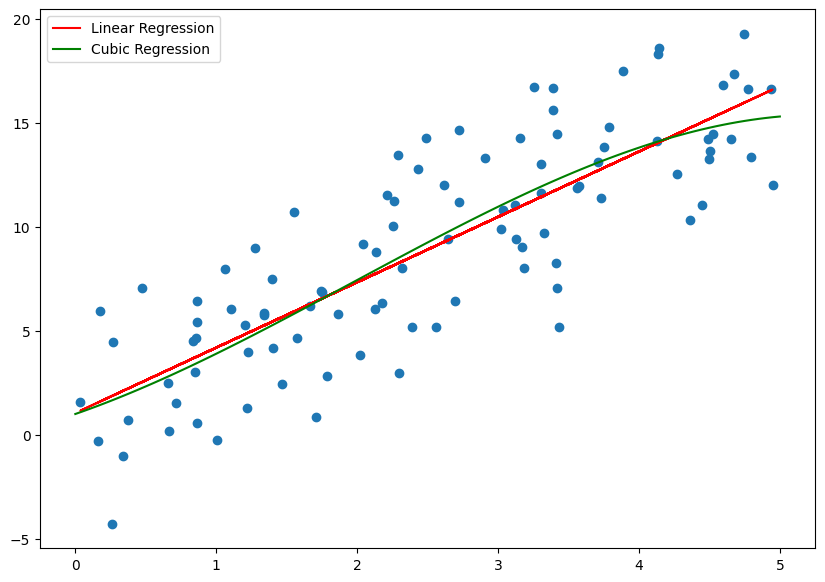

In [2]:
import numpy as np, matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

X = np.random.random_sample(100) * 5
error = np.random.normal(-2, 3, 100)
y = 2 + 3.4*X + error #linear relationship

figure = plt.figure(figsize=(10,7))
ax = figure.add_subplot()

linear_model = LinearRegression()
linear_model = linear_model.fit(X.reshape(-1, 1), y)

cubic_model = LinearRegression()
cubic = PolynomialFeatures(3)
X_cubic = cubic.fit_transform(X.reshape(-1, 1))
cubic_model = cubic_model.fit(X_cubic, y)

ax.scatter(X, y)
ax.plot(X, linear_model.predict(X.reshape(-1, 1)), c='red', label='Linear Regression')
X_plot = np.linspace(0, 5, 100)
X_plot_cubic = cubic.fit_transform(X_plot.reshape(-1, 1))
ax.plot(X_plot, cubic_model.predict(X_plot_cubic), color='green', label='Cubic Regression')
ax.legend()

print('Training MSE Cubic: ', mean_squared_error(y, cubic_model.predict(X_cubic)))
print('Training MSE Linear: ', mean_squared_error(y, linear_model.predict(X.reshape(-1, 1))))



*(b) Answer (a) using test rather than training RSS*

The linear model would have a lower test RSS than the cubic model. This is because the cubic model has overfit to the training data, creating the functional form based on noise in the training data. When the cubic model tries to predict the test data it will create estimates based on noise in the training data, leading to estimates with high error. Lets demonstrate this using python.

We plot the regression lines for each model agaisnt the test data. We can see that the shape of the cubic model is not aligned to the test data, this is because it has overfit to the training data. The linear model has a much lower MSE for the test data


Cubic Model Test MSE:  8.143583842973797
Linear Model Test MSE:  7.461380358046337


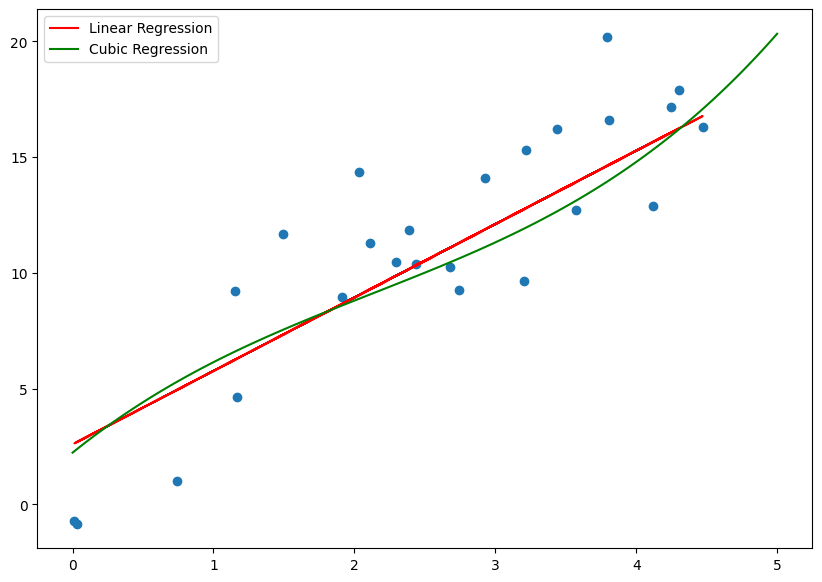

In [4]:
from sklearn.model_selection import train_test_split


X = np.random.random_sample(100) * 5
error = np.random.normal(0, 3, 100)
y = 2 + 3.4*X + error #linear relationship

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

figure = plt.figure(figsize=(10,7))
ax = figure.add_subplot()

linear_model = LinearRegression()
linear_model = linear_model.fit(X_train.reshape(-1, 1), y_train)

cubic_model = LinearRegression()
cubic = PolynomialFeatures(3)
X_cubic = cubic.fit_transform(X_train.reshape(-1, 1))
cubic_model = cubic_model.fit(X_cubic, y_train)

print('Cubic Model Test MSE: ', mean_squared_error(y_test, cubic_model.predict(cubic.fit_transform(X_test.reshape(-1, 1)))))
print('Linear Model Test MSE: ', mean_squared_error(y_test, linear_model.predict(X_test.reshape(-1, 1))))

ax.scatter(x=X_test, y=y_test)
ax.plot(X_test, linear_model.predict(X_test.reshape(-1, 1)), c='red', label='Linear Regression')

X_plot = np.linspace(0, 5, 100)
X_plot_cubic = cubic.fit_transform(X_plot.reshape(-1, 1))
ax.plot(X_plot, cubic_model.predict(X_plot_cubic), color='green', label='Cubic Regression')
ax.legend()


**4. Consider the fitted values that result from performing linear regression without an intercept. In this setting, the ith fitted value takes the form $$\hat{y}_{i} = x_{i}\hat{\beta}_{i}$$ where $$\hat{\beta} = \sum_{i=1}^{n}x_{i}y_{i} / \sum_{i'=1}^{n}x^{2}_{i'}$$ Show that we can write $$\hat{y}_{i} = \sum_{i'}^{n}a_{i'}y_{i'}$$**